### [Reference Note](https://signature95.tistory.com/m/49)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# from sklearn.datasets import load_boston
warnings.filterwarnings("ignore")




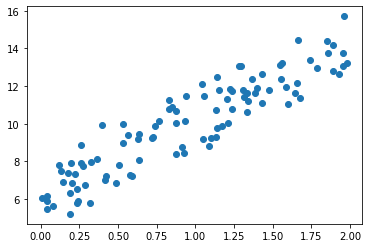

In [16]:
np.random.seed(0)
X = 2 * np.random.rand(100,1)
y = 6 + 4*X+np.random.randn(100,1)

plt.scatter(X,y)

R-squared :  0.84066
constant coef p 값 :  0.00000
feature coef p 값 :  0.00000
MSE :  1.01269


결정계수 R-squared :  0.84066
constant coef(계수)에 대한 p 값 :  0.00000
feature coef(계수)에 대한 p 값 :  0.00000
잔차의 제곱합 MSE :  1.01269




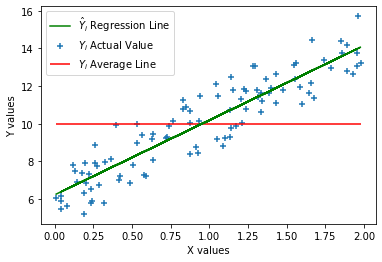

In [22]:
import statsmodels.api as sm

# target은 종속변수, feature는 독립변수와 같다.
target = y
feature = X


# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
feature_add = sm.add_constant(feature, has_constant='add')
# 상수항 더한 것 확인
# feature_add

# # sm OLS 적합
model = sm.OLS(target, feature_add)
fitted_model = model.fit()

# # 통계치 출력
print(f'R-squared : {fitted_model.rsquared : .5f}')
print(f'constant coef p 값 : {fitted_model.pvalues[0] : .5f}')
print(f'feature coef p 값 : {fitted_model.pvalues[1] : .5f}')
print(f'MSE : {fitted_model.mse_resid : .5f}')
print('\n')
# # # 회귀선 도출
target_pred1 = fitted_model.predict()

# # # 통계치 출력
print(f'결정계수 R-squared : {fitted_model.rsquared : .5f}')
print(f'constant coef(계수)에 대한 p 값 : {fitted_model.pvalues[0] : .5f}')
print(f'feature coef(계수)에 대한 p 값 : {fitted_model.pvalues[1] : .5f}')
print(f'잔차의 제곱합 MSE : {fitted_model.mse_resid : .5f}')
print('\n')
# # # 회귀선 도출
target_pred1 = fitted_model.predict()

plt.scatter(feature, target, marker='+', label='$Y_i$ Actual Value')
plt.plot(feature, target_pred1, color = 'g', label='$\hat{Y}_i$ Regression Line')
plt.hlines(target.mean(), feature.min(), feature.max(), color = 'r', label='$Y_i$ Average Line')
plt.legend()
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()